In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

for dirname, _, filenames in os.walk('/kaggle/input/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
root_path = '/kaggle/working/'
path = '/kaggle/input/images/bird-8788491_1280.jpg'

/kaggle/input/images/bird-8788491_1280.jpg


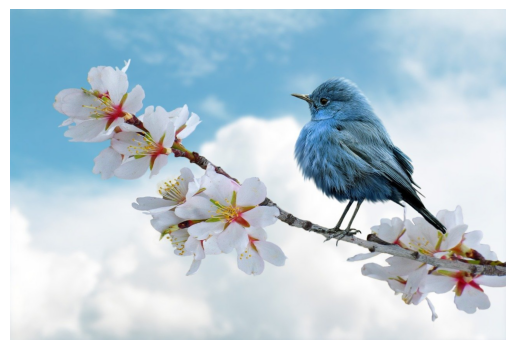

In [2]:
img = Image.open(path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
def rgb_to_gray_scale(img):
    width, height = img.size
    grayscale_array = np.zeros((height, width), dtype=np.uint8)
    
    for i in range(height):
        for j in range(width):
            r, g, b = img.getpixel((j,i))
            grayscale_value = int(0.2989*r + 0.5870*g + 0.1140*b)
            grayscale_array[i,j] = grayscale_value
    return grayscale_array

In [4]:
def save_grayscale_to_file(grayscale_array, file_name):
    np.savetxt(file_name, grayscale_array, fmt='%d',delimiter=',')
    print(f"Grayscale data saved in {file_name}")
    
def display_from_array(img_array, cmap):
    plt.imshow(img_array, cmap = cmap, vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

In [5]:
def individual_chanel_show(img):
    r_chanel, g_chanel, b_chanel = img.split()
    r_array = np.array(r_chanel)
    print('Red print here')
    display_from_array(r_array,cmap='Reds')
    
    g_array = np.array(g_chanel)
    print('Red print here')
    display_from_array(g_array,cmap='Greens')
    
    b_array = np.array(b_chanel)
    print('Red print here')
    display_from_array(b_array,cmap='Blues')

In [6]:
def modify_images(grayscale_array, constant):
    modified_array = np.zeros_like(grayscale_array)
    
    modified_array = np.clip(grayscale_array + constant, 0, 255)
    print(f"Add by constant {constant}")
    display_from_array(modified_array, cmap='gray')
    
    modified_array = np.clip(grayscale_array -constant, 0, 255)
    print(f"Substract by {constant}")
    display_from_array(modified_array, cmap='gray') 
    
    modified_array = np.clip(grayscale_array * constant, 0, 255)
    print(f"Multyply by constant {constant}")
    display_from_array(modified_array, cmap='gray') 
    
    modified_array = np.clip(grayscale_array / constant, 0, 255)
    print(f"Divide constant {constant}")
    display_from_array(modified_array, cmap='gray') 
    
    modified_array = np.clip(255 -  grayscale_array, 0, 255)
    print(f"Substaract from 255")
    display_from_array(modified_array, cmap='gray')

In [17]:
def intensity(image, grayscale_arrray):
    a=1
    b=1
    c=1
    d=1
    width, height = image.size
    intensity_array = np.zeros((height, width), dtype=np.uint8)
    for y in range(height-1):
        for x in range(width-1):
            intensity_array[y,x] = grayscale_arrray[y,x]*a+grayscale_arrray[y,x+1]*b+grayscale_arrray[y+1,x]*c+grayscale_arrray[y+1,x+1]*d

    display_from_array(intensity_array, cmap='gray')

Grayscale data saved in /kaggle/working/grayscale.txt


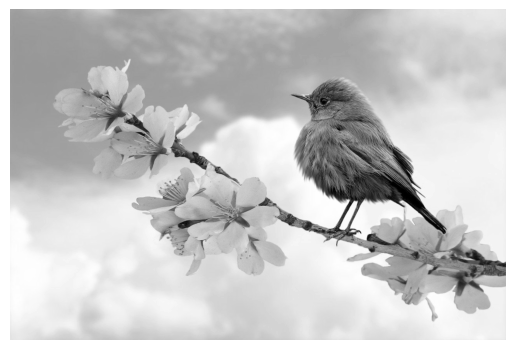

Add by constant 10


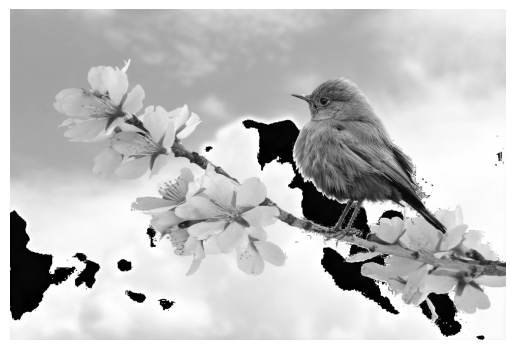

Substract by 10


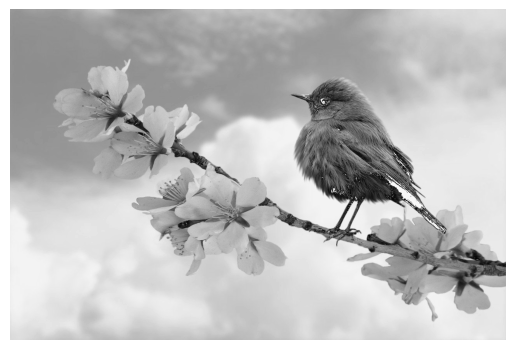

Multyply by constant 10


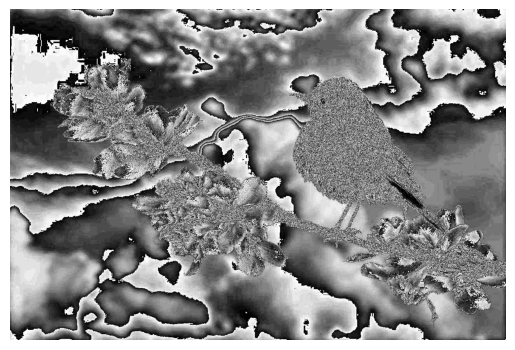

Divide constant 10


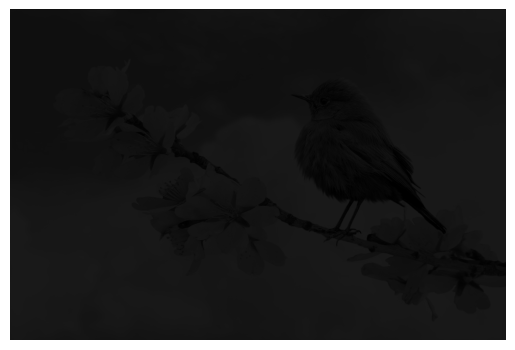

Substaract from 255


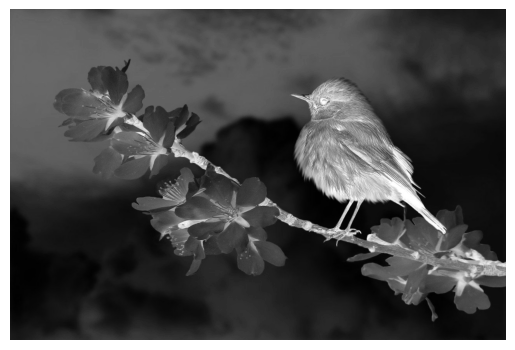

Red print here


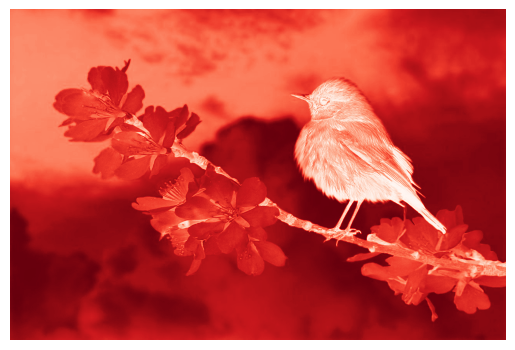

Red print here


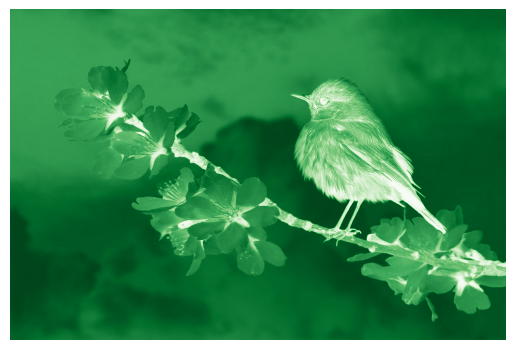

Red print here


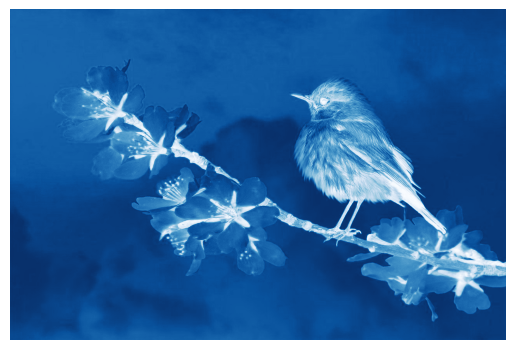

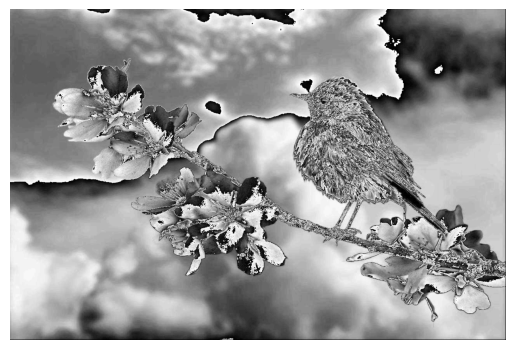

In [19]:
grayscale_array = rgb_to_gray_scale(img)
grayscale_txt_file_name = root_path + 'grayscale.txt'
save_grayscale_to_file(grayscale_array, grayscale_txt_file_name)
display_from_array(grayscale_array, 'gray')
modify_images(grayscale_array, 10)
individual_chanel_show(img)
intensity(img, grayscale_array)